##### Copyright 2021 The Cirq Developers

In [1]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://quantumai.google/cirq/noise/qcvv/parallel_xeb"><img src="https://quantumai.google/site-assets/images/buttons/quantumai_logo_1x.png" />View on QuantumAI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/quantumlib/Cirq/blob/main/docs/noise/qcvv/parallel_xeb.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/colab_logo_1x.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/quantumlib/Cirq/blob/main/docs/noise/qcvv/parallel_xeb.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/github_logo_1x.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/Cirq/docs/noise/qcvv/parallel_xeb.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/download_icon_1x.png" />Download notebook</a>
  </td>
</table>

In [2]:
try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq
    print("installed cirq.")

installing cirq...


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.17.1 requires protobuf<4.22,>=4.21.6; python_version < "3.11", but you have protobuf 5.29.5 which is incompatible.


installed cirq.


# Parallel XEB
This notebook demonstrates how to use the functionality in `cirq.experiments` to run parallel XEB end-to-end. "Parallel" means we characterize multiple pairs simultaneously.

In [3]:
import cirq
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt

# Parallel XEB with library functions
The entire XEB workflow can be run by calling `cirq.experiments.parallel_two_qubit_xeb` and the combined single-qubit randomized benchmarking (RB) and XEB workflows can be run by calling `cirq.experiments.run_rb_and_xeb`.

In [4]:
# Simulation
qubits = cirq.GridQubit.rect(3, 2, 4, 3)
result = cirq.experiments.parallel_two_qubit_xeb(
    sampler=cirq.DensityMatrixSimulator(
        noise=cirq.depolarize(5e-3), dtype=np.complex128
    ),  # Any simulator or a ProcessorSampler.
    qubits=qubits,
)

  0%|          | 0/243 [00:00<?, ?it/s]

  4%|▎         | 9/243 [00:11<04:46,  1.23s/it]

  7%|▋         | 18/243 [00:15<03:00,  1.24it/s]

 11%|█         | 27/243 [00:20<02:30,  1.44it/s]

 15%|█▍        | 36/243 [00:30<02:57,  1.17it/s]

 19%|█▊        | 45/243 [00:38<02:49,  1.17it/s]

 22%|██▏       | 54/243 [00:43<02:21,  1.34it/s]

 26%|██▌       | 63/243 [00:47<01:59,  1.50it/s]

 30%|██▉       | 72/243 [00:53<01:54,  1.50it/s]

 33%|███▎      | 81/243 [00:57<01:37,  1.66it/s]

 37%|███▋      | 90/243 [01:05<01:43,  1.48it/s]

 41%|████      | 99/243 [01:11<01:38,  1.46it/s]

 44%|████▍     | 108/243 [01:15<01:21,  1.66it/s]

 48%|████▊     | 117/243 [01:22<01:20,  1.56it/s]

 52%|█████▏    | 126/243 [01:28<01:17,  1.50it/s]

 56%|█████▌    | 135/243 [01:34<01:12,  1.49it/s]

 59%|█████▉    | 144/243 [01:40<01:06,  1.48it/s]

 63%|██████▎   | 153/243 [01:46<00:58,  1.54it/s]

 67%|██████▋   | 162/243 [01:51<00:52,  1.55it/s]

 70%|███████   | 171/243 [01:59<00:51,  1.41it/s]

 74%|███████▍  | 180/243 [02:08<00:50,  1.25it/s]

 78%|███████▊  | 189/243 [02:16<00:43,  1.23it/s]

 81%|████████▏ | 198/243 [02:18<00:29,  1.55it/s]

 85%|████████▌ | 207/243 [02:22<00:21,  1.71it/s]

 89%|████████▉ | 216/243 [02:27<00:15,  1.72it/s]

 93%|█████████▎| 225/243 [02:34<00:11,  1.58it/s]

 96%|█████████▋| 234/243 [02:40<00:05,  1.54it/s]

100%|██████████| 243/243 [02:45<00:00,  1.60it/s]

100%|██████████| 243/243 [02:45<00:00,  1.47it/s]

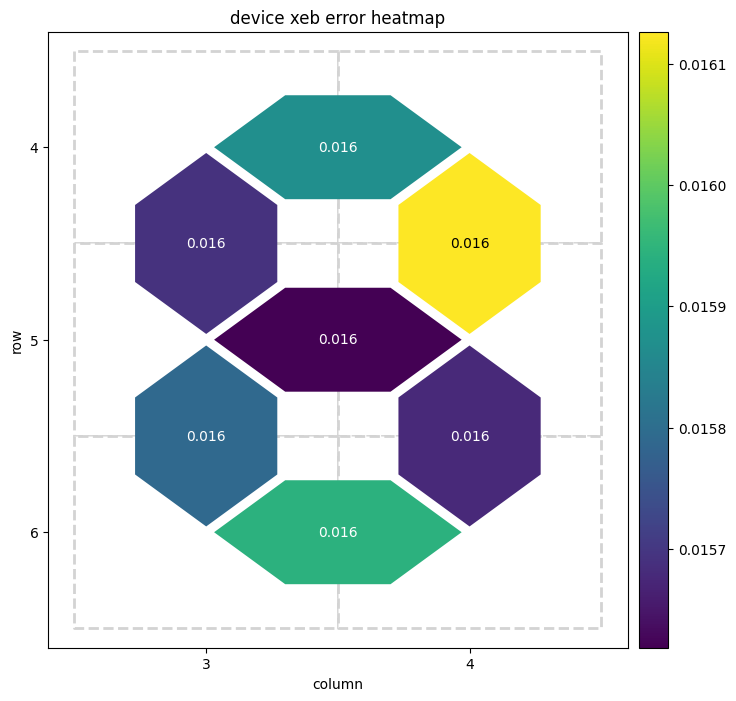

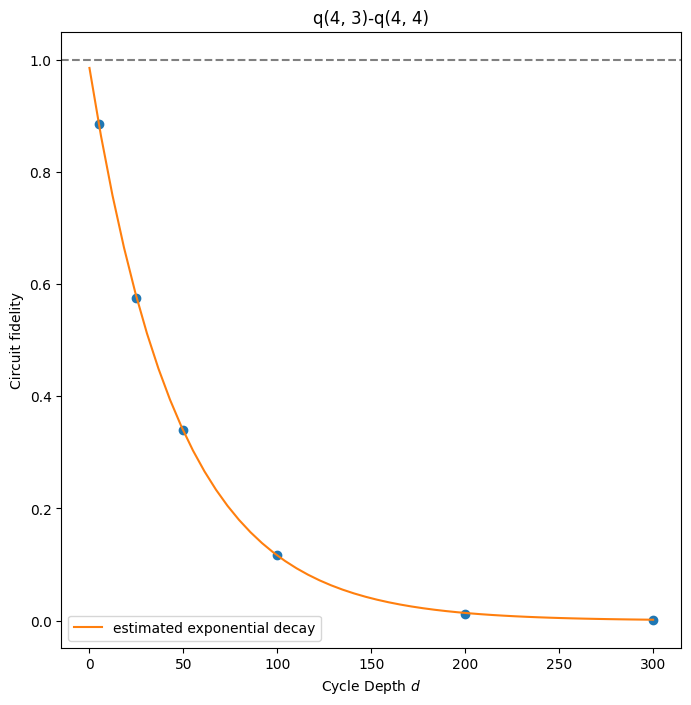

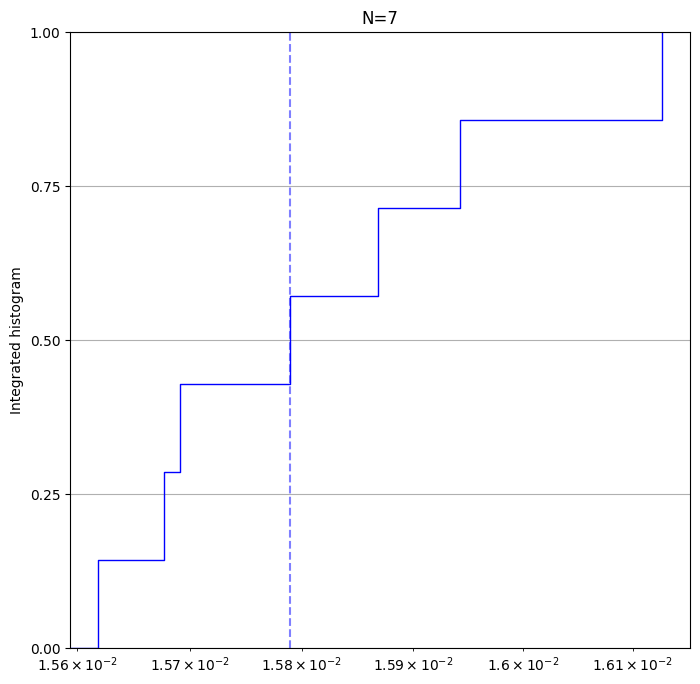

In [5]:
# The returned result is an instance of the `TwoQubitXEBResult` class which provides visualization methods like
result.plot_heatmap()
# plot the heatmap of XEB errors
result.plot_fitted_exponential(*qubits[:2])
# plot the fitted model of xeb error of a qubit pair.
result.plot_histogram();  # plot a histogram of all xeb errors.

In [6]:
# `TwoQubitXEBResult` also has methods to retrieve errors.
print('pauli errors:', result.pauli_error())
print('xeb errors:', result.xeb_error(*qubits[:2]))
print('xeb fidelity:', result.xeb_fidelity(*qubits[:2]))

pauli errors: {(cirq.GridQubit(4, 3), cirq.GridQubit(4, 4)): np.float64(0.019835896750389596), (cirq.GridQubit(4, 3), cirq.GridQubit(5, 3)): np.float64(0.019613922392582306), (cirq.GridQubit(4, 4), cirq.GridQubit(5, 4)): np.float64(0.020158079809996406), (cirq.GridQubit(5, 3), cirq.GridQubit(5, 4)): np.float64(0.019523058811304374), (cirq.GridQubit(5, 3), cirq.GridQubit(6, 3)): np.float64(0.019736423224559763), (cirq.GridQubit(5, 4), cirq.GridQubit(6, 4)): np.float64(0.019596043847401635), (cirq.GridQubit(6, 3), cirq.GridQubit(6, 4)): np.float64(0.019928119059041058)}
xeb errors: 0.015868717400311705
xeb fidelity: 0.9841312825996883


The `run_rb_and_xeb` method returns an object of type [InferredXEBResult](https://github.com/quantumlib/Cirq/blob/bc766606b94744f80da435c522d16a34529ae671/cirq-core/cirq/experiments/two_qubit_xeb.py#L188C7-L188C24) which is like [TwoQubitXEBResult](https://github.com/quantumlib/Cirq/blob/bc766606b94744f80da435c522d16a34529ae671/cirq-core/cirq/experiments/two_qubit_xeb.py#L56) except that it removes the single-qubit errors obtained from the single-qubit randomized benchmarking (RB) experiment to isolate the error from the two qubit gate.

# Step by step XEB
The rest of this notebook explains how the `parallel_two_qubit_xeb` works internally. Note that the notebook uses `SQRT_ISWAP` as the entangling gate while `parallel_two_qubit_xeb` and `run_rb_and_xeb` default to `CZ`.

## Set up Random Circuits

We create a library of 10 random, two-qubit `circuits` using the sqrt(ISWAP) gate. These library circuits will be mixed-and-matched among all the pairs on the device we aim to characterize.

In [7]:
from cirq.experiments import random_quantum_circuit_generation as rqcg

circuit_library = rqcg.generate_library_of_2q_circuits(
    n_library_circuits=20, two_qubit_gate=cirq.ISWAP**0.5, random_state=52
)
print(len(circuit_library))

20


In [8]:
# We will truncate to these lengths
max_depth = 100
cycle_depths = np.arange(3, max_depth, 20)
cycle_depths

array([ 3, 23, 43, 63, 83])

## Determine the device topology

We will run on all pairs from a given device topology. Below, you can supply a `device_name` if you're authenticated to run on Google QCS. In that case, we will get the device object from the cloud endpoint and turn it into a graph of qubits. Otherwise, we mock a device graph by allocating arbitrary `cirq.GridQubit`s to turn into a graph.

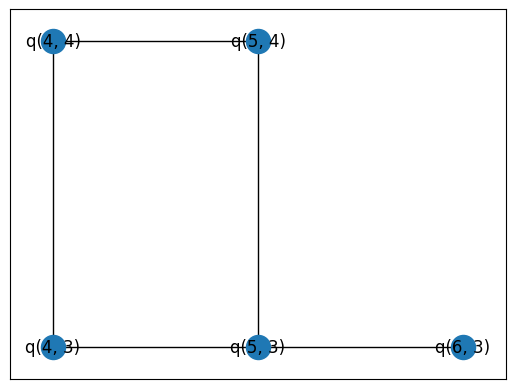

In [9]:
device_name = None  # change me!

import cirq.contrib.routing as ccr
import networkx as nx

if device_name is None:
    qubits = cirq.GridQubit.rect(3, 2, 4, 3)
    # Delete one qubit from the rectangular arangement to
    # 1) make it irregular 2) simplify simulation.
    qubits = qubits[:-1]
    sampler = cirq.DensityMatrixSimulator(noise=cirq.depolarize(5e-3))
    graph = ccr.gridqubits_to_graph_device(qubits)
else:
    import cirq_google as cg

    sampler = cg.get_engine_sampler(device_name, gate_set_name='sqrt_iswap')
    device = cg.get_engine_device(device_name)
    qubits = sorted(device.qubits)
    graph = ccr.gridqubits_to_graph_device(device.qubits)


pos = {q: (q.row, q.col) for q in qubits}
nx.draw_networkx(graph, pos=pos)

## Set up our combinations
We take the library of two-qubit circuits in `circuit_library` and mix-and-match to sampled in parallel.

We will pass `combs_by_layer` and `circuit_library` to the sampling function which will "zip" the circuits according to these combinations. The outer list corresponds to the four `cirq.GridInteractionLayer`s (one of four for the degree-four GridQubit-implied graph). The inner `combinations` matrix is a `(n_combinations, n_pairs)` ndarray of integers which index into the circuit library.

In [10]:
combs_by_layer = rqcg.get_random_combinations_for_device(
    n_library_circuits=len(circuit_library), n_combinations=10, device_graph=graph, random_state=53
)
combs_by_layer

[CircuitLibraryCombination(layer=cirq.experiments.GridInteractionLayer(col_offset=0, vertical=True, stagger=True), combinations=array([[ 5, 16],
        [12,  9],
        [ 5, 18],
        [11,  3],
        [ 6,  9],
        [13,  3],
        [11,  6],
        [14, 12],
        [16, 10],
        [18, 15]]), pairs=[(cirq.GridQubit(4, 4), cirq.GridQubit(5, 4)), (cirq.GridQubit(5, 3), cirq.GridQubit(6, 3))]),
 CircuitLibraryCombination(layer=cirq.experiments.GridInteractionLayer(col_offset=1, vertical=True, stagger=True), combinations=array([[16],
        [ 3],
        [12],
        [ 0],
        [ 5],
        [ 5],
        [ 0],
        [ 7],
        [ 9],
        [12]]), pairs=[(cirq.GridQubit(4, 3), cirq.GridQubit(5, 3))]),
 CircuitLibraryCombination(layer=cirq.experiments.GridInteractionLayer(col_offset=1, vertical=False, stagger=True), combinations=array([[13],
        [ 8],
        [ 8],
        [13],
        [ 1],
        [11],
        [11],
        [ 8],
        [14],
        [14]

### Visualize
Here, we draw the four layers' active pairs.

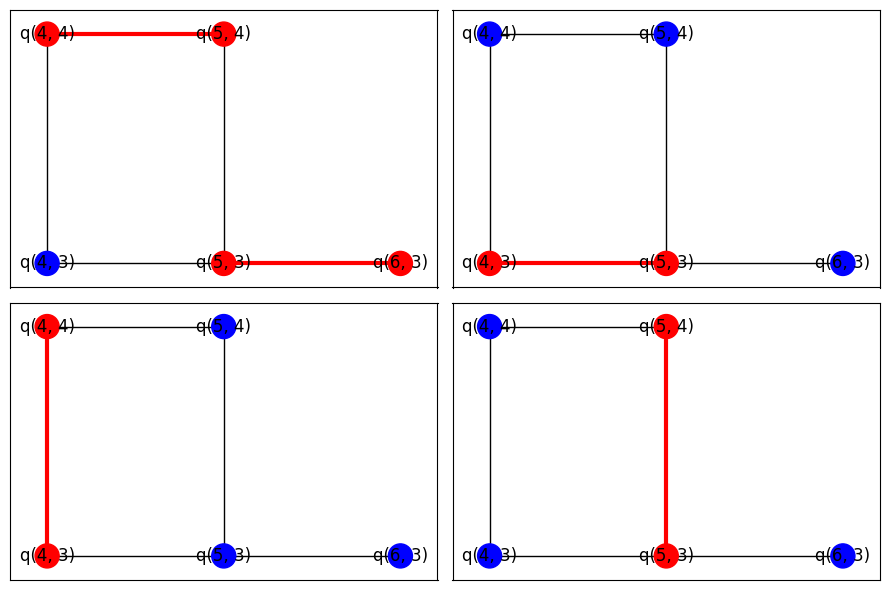

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(9, 6))
for comb_layer, ax in zip(combs_by_layer, axes.reshape(-1)):
    active_qubits = np.array(comb_layer.pairs).reshape(-1)
    colors = ['red' if q in active_qubits else 'blue' for q in graph.nodes]
    nx.draw_networkx(graph, pos=pos, node_color=colors, ax=ax)
    nx.draw_networkx_edges(
        graph, pos=pos, edgelist=comb_layer.pairs, width=3, edge_color='red', ax=ax
    )

plt.tight_layout()

## Take Data

The following call will execute the zipped circuits and sample bitstrings.

In [12]:
from cirq.experiments.xeb_sampling import sample_2q_xeb_circuits

sampled_df = sample_2q_xeb_circuits(
    sampler=sampler,
    circuits=circuit_library,
    cycle_depths=cycle_depths,
    combinations_by_layer=combs_by_layer,
    shuffle=np.random.RandomState(52),
    repetitions=10_000,
)
sampled_df

  0%|          | 0/207 [00:00<?, ?it/s]

  4%|▍         | 9/207 [00:02<00:44,  4.44it/s]

  9%|▊         | 18/207 [00:03<00:38,  4.96it/s]

 13%|█▎        | 27/207 [00:04<00:30,  5.82it/s]

 17%|█▋        | 36/207 [00:07<00:34,  4.91it/s]

 22%|██▏       | 45/207 [00:09<00:35,  4.56it/s]

 26%|██▌       | 54/207 [00:11<00:34,  4.45it/s]

 30%|███       | 63/207 [00:12<00:28,  5.07it/s]

 35%|███▍      | 72/207 [00:15<00:31,  4.35it/s]

 39%|███▉      | 81/207 [00:17<00:28,  4.40it/s]

 43%|████▎     | 90/207 [00:20<00:28,  4.05it/s]

 48%|████▊     | 99/207 [00:21<00:24,  4.33it/s]

 52%|█████▏    | 108/207 [00:24<00:23,  4.21it/s]

 57%|█████▋    | 117/207 [00:26<00:22,  4.06it/s]

 61%|██████    | 126/207 [00:28<00:20,  4.00it/s]

 65%|██████▌   | 135/207 [00:31<00:18,  3.98it/s]

 70%|██████▉   | 144/207 [00:33<00:16,  3.79it/s]

 74%|███████▍  | 153/207 [00:35<00:12,  4.26it/s]

 78%|███████▊  | 162/207 [00:37<00:10,  4.45it/s]

 83%|████████▎ | 171/207 [00:39<00:08,  4.12it/s]

 87%|████████▋ | 180/207 [00:40<00:05,  4.71it/s]

 91%|█████████▏| 189/207 [00:42<00:03,  4.75it/s]

 96%|█████████▌| 198/207 [00:45<00:02,  4.18it/s]

100%|██████████| 207/207 [00:45<00:00,  5.65it/s]

100%|██████████| 207/207 [00:45<00:00,  4.52it/s]

sampled_probs     timestamp  \
circuit_i cycle_depth                                                   
6         43            [0.1908, 0.2038, 0.395, 0.2104]  1.748600e+09   
8         23           [0.1686, 0.1058, 0.2225, 0.5031]  1.748600e+09   
12        63           [0.3242, 0.2126, 0.2116, 0.2516]  1.748600e+09   
1         43           [0.2169, 0.3563, 0.2237, 0.2031]  1.748600e+09   
          43           [0.2206, 0.3427, 0.2312, 0.2055]  1.748600e+09   
...                                                 ...           ...   
6         43            [0.1755, 0.2052, 0.399, 0.2203]  1.748600e+09   
16        63            [0.215, 0.2675, 0.2732, 0.2443]  1.748600e+09   
0         3             [0.0835, 0.028, 0.3523, 0.5362]  1.748600e+09   
3         3            [0.4863, 0.0375, 0.2906, 0.1856]  1.748600e+09   
11        63           [0.1843, 0.2343, 0.1915, 0.3899]  1.748600e+09   

                       layer_i  pair_i  combination_i                pair  
circuit_i cycle_depth                                                      
6         43                 3       0              9  (q(5, 3), q(5, 4))  
8         23                 2       0              2  (q(4, 3), q(4, 4))  
12        63                 1       0              2  (q(4, 3), q(5, 3))  
1         43                 3       0              4  (q(5, 3), q(5, 4))  
          43                 2       0              4  (q(4, 3), q(4, 4))  
...                        ...     ...            ...                 ...  
6         43                 0       1              6  (q(5, 3), q(6, 3))  
16        63                 3       0              1  (q(5, 3), q(5, 4))  
0         3                  1       0              3  (q(4, 3), q(5, 3))  
3         3                  1       0              1  (q(4, 3), q(5, 3))  
11        63                 3       0              6  (q(5, 3), q(5, 4))  

[250 rows x 6 columns]

## Benchmark Fidelities

In [13]:
from cirq.experiments.xeb_fitting import benchmark_2q_xeb_fidelities

fids = benchmark_2q_xeb_fidelities(
    sampled_df=sampled_df, circuits=circuit_library, cycle_depths=cycle_depths
)
fids

layer_i  pair_i  cycle_depth  fidelity  fidelity_variance  \
0         0       0            3  0.937237           0.701181   
1         0       0           23  0.603487           0.581577   
2         0       0           43  0.390834           0.292390   
3         0       0           63  0.264311           0.160209   
4         0       0           83  0.170729           0.676077   
5         0       1            3  0.931919           0.570851   
6         0       1           23  0.599325           0.755982   
7         0       1           43  0.396264           0.196199   
8         0       1           63  0.252851           0.320547   
9         0       1           83  0.163350           0.560187   
10        1       0            3  0.922938           0.424083   
11        1       0           23  0.609907           0.561789   
12        1       0           43  0.396335           0.359155   
13        1       0           63  0.261335           0.393341   
14        1       0           83  0.168573           0.792990   
15        2       0            3  0.927926           0.555682   
16        2       0           23  0.604554           0.421388   
17        2       0           43  0.399752           0.260556   
18        2       0           63  0.256615           0.217099   
19        2       0           83  0.164866           0.399436   
20        3       0            3  0.937109           0.458101   
21        3       0           23  0.603985           0.167178   
22        3       0           43  0.396245           0.168471   
23        3       0           63  0.254958           0.188476   
24        3       0           83  0.168396           0.334439   

                  pair  
0   (q(4, 4), q(5, 4))  
1   (q(4, 4), q(5, 4))  
2   (q(4, 4), q(5, 4))  
3   (q(4, 4), q(5, 4))  
4   (q(4, 4), q(5, 4))  
5   (q(5, 3), q(6, 3))  
6   (q(5, 3), q(6, 3))  
7   (q(5, 3), q(6, 3))  
8   (q(5, 3), q(6, 3))  
9   (q(5, 3), q(6, 3))  
10  (q(4, 3), q(5, 3))  
11  (q(4, 3), q(5, 3))  
12  (q(4, 3), q(5, 3))  
13  (q(4, 3), q(5, 3))  
14  (q(4, 3), q(5, 3))  
15  (q(4, 3), q(4, 4))  
16  (q(4, 3), q(4, 4))  
17  (q(4, 3), q(4, 4))  
18  (q(4, 3), q(4, 4))  
19  (q(4, 3), q(4, 4))  
20  (q(5, 3), q(5, 4))  
21  (q(5, 3), q(5, 4))  
22  (q(5, 3), q(5, 4))  
23  (q(5, 3), q(5, 4))  
24  (q(5, 3), q(5, 4))

In [14]:
from cirq.experiments.xeb_fitting import fit_exponential_decays, exponential_decay

fidelities = fit_exponential_decays(fids)

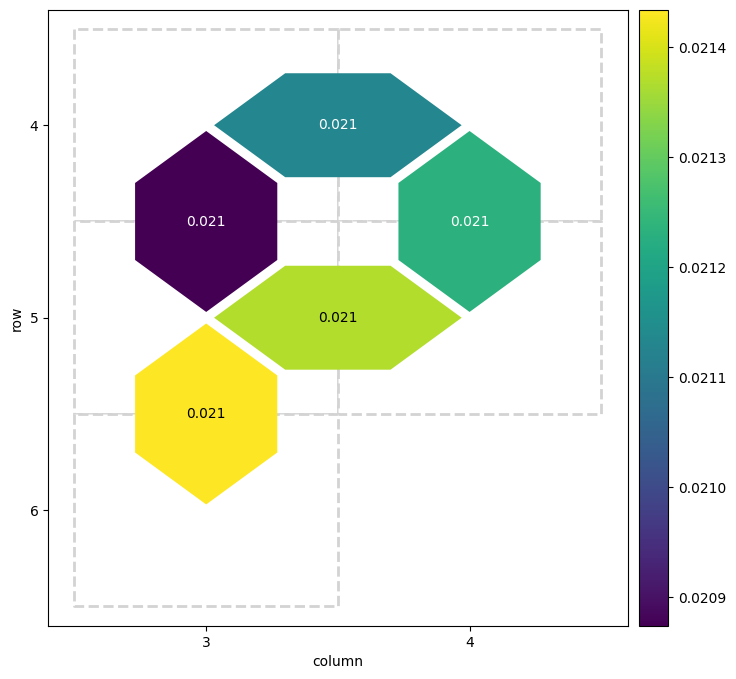

In [15]:
heatmap_data = {}

for (_, _, pair), fidelity in fidelities.layer_fid.items():
    heatmap_data[pair] = 1.0 - fidelity

cirq.TwoQubitInteractionHeatmap(heatmap_data).plot();

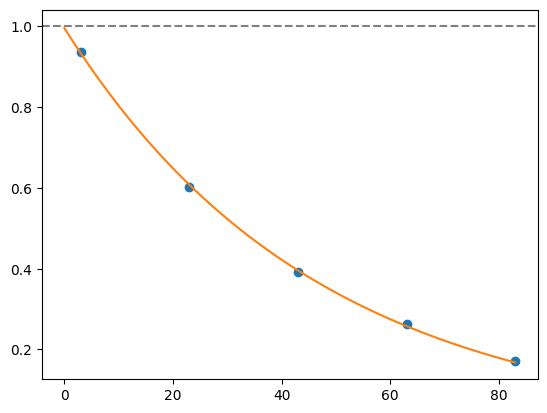

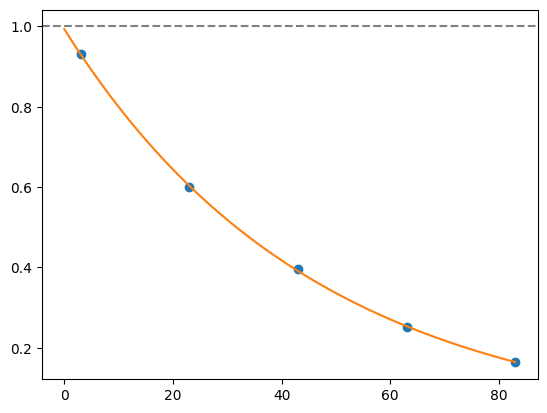

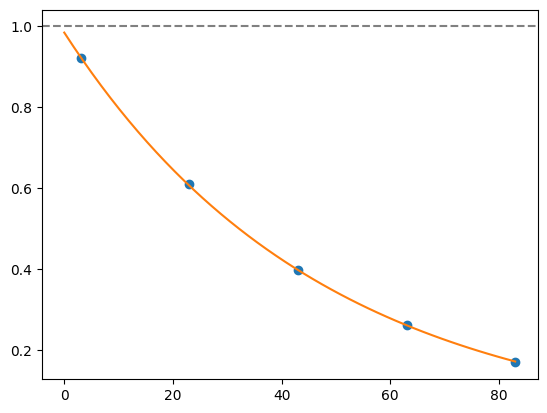

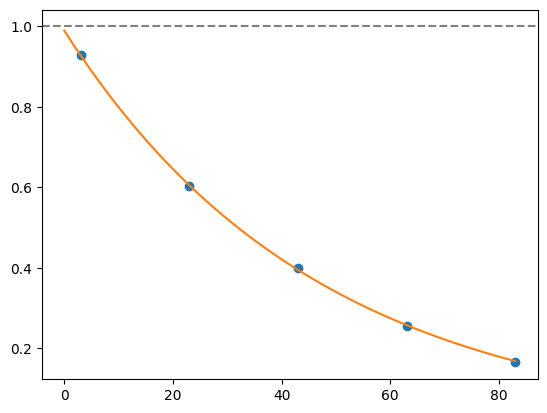

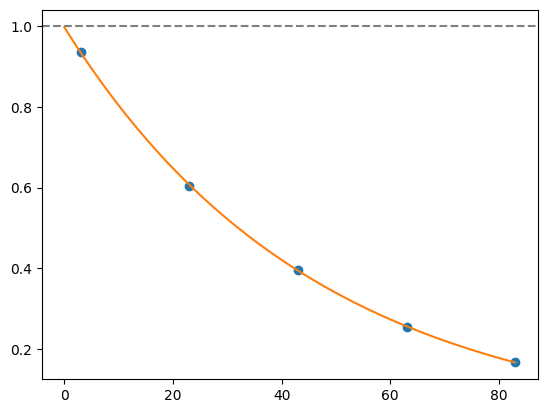

In [16]:
for i, record in fidelities.iterrows():
    plt.axhline(1, color='grey', ls='--')
    plt.plot(record['cycle_depths'], record['fidelities'], 'o')
    xx = np.linspace(0, np.max(record['cycle_depths']))
    plt.plot(xx, exponential_decay(xx, a=record['a'], layer_fid=record['layer_fid']))
    plt.show()

/tmpfs/tmp/ipykernel_78850/3110110171.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  fids.groupby('pair').apply(_p)


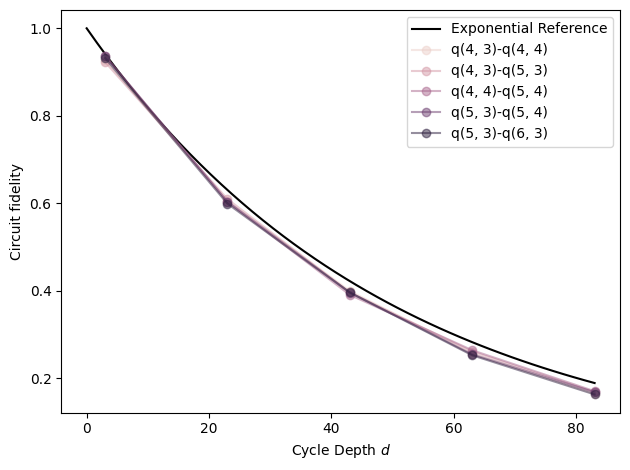

In [17]:
import seaborn as sns

# Give each pair its own color
colors = sns.cubehelix_palette(n_colors=graph.number_of_edges())
colors = dict(zip(graph.edges, colors))

# Exponential reference
xx = np.linspace(0, fids['cycle_depth'].max())
plt.plot(xx, (1 - 5e-3) ** (4 * xx), label=r'Exponential Reference', color='black')


# Plot each pair
def _p(fids):
    q0, q1 = fids.name
    plt.plot(
        fids['cycle_depth'],
        fids['fidelity'],
        'o-',
        label=f'{q0}-{q1}',
        color=colors[fids.name],
        alpha=0.5,
    )


fids.groupby('pair').apply(_p)

plt.ylabel('Circuit fidelity')
plt.xlabel('Cycle Depth $d$')
plt.legend(loc='best')
plt.tight_layout()

## Optimize `PhasedFSimGate` parameters

We know what circuits we requested, and in this simulated example, we know what coherent error has happened. But in a real experiment, there is likely unknown coherent error that you would like to characterize. Therefore, we make the five angles in `PhasedFSimGate` free parameters and use a classical optimizer to find which set of parameters best describes the data we collected from the noisy simulator (or device, if this was a real experiment).

In [18]:
import multiprocessing

pool = multiprocessing.get_context('spawn').Pool()

In [19]:
from cirq.experiments.xeb_fitting import (
    parameterize_circuit,
    characterize_phased_fsim_parameters_with_xeb_by_pair,
    SqrtISwapXEBOptions,
)

# Set which angles we want to characterize (all)
options = SqrtISwapXEBOptions(
    characterize_theta=True,
    characterize_zeta=True,
    characterize_chi=True,
    characterize_gamma=True,
    characterize_phi=True,
)
# Parameterize the sqrt(iswap)s in our circuit library
pcircuits = [parameterize_circuit(circuit, options) for circuit in circuit_library]

# Run the characterization loop
characterization_result = characterize_phased_fsim_parameters_with_xeb_by_pair(
    sampled_df,
    pcircuits,
    cycle_depths,
    options,
    pool=pool,
    # ease tolerance so it converges faster:
    fatol=1e-2,
    xatol=1e-2,
)

In [20]:
characterization_result.final_params

{(cirq.GridQubit(5, 3),
  cirq.GridQubit(5, 4)): {'theta': np.float64(-0.8367987404054755), 'zeta': np.float64(0.10041558244274296), 'chi': np.float64(-0.07510134699446311), 'gamma': np.float64(-0.017183029157944202), 'phi': np.float64(0.004193753360909505)},
 (cirq.GridQubit(4, 3),
  cirq.GridQubit(4, 4)): {'theta': np.float64(-0.8474371212531532), 'zeta': np.float64(-0.10035248634877036), 'chi': np.float64(-0.07034612478660182), 'gamma': np.float64(0.050899749487735915), 'phi': np.float64(-0.041682247860173494)},
 (cirq.GridQubit(4, 3),
  cirq.GridQubit(5, 3)): {'theta': np.float64(-0.7552448278453846), 'zeta': np.float64(0.033253969974588855), 'chi': np.float64(-0.03479666867301002), 'gamma': np.float64(0.03136281359839602), 'phi': np.float64(-0.06806601866053645)},
 (cirq.GridQubit(4, 4),
  cirq.GridQubit(5, 4)): {'theta': np.float64(-0.7790601994013041), 'zeta': np.float64(0.032579693881346745), 'chi': np.float64(-0.02279511443835067), 'gamma': np.float64(0.00337801077356593), 'ph

In [21]:
characterization_result.fidelities_df

layer_i  pair_i  cycle_depth  fidelity  fidelity_variance  \
0        3       0            3  0.947731           0.486353   
1        3       0           23  0.701709           0.566718   
2        3       0           43  0.425646           0.372376   
3        3       0           63  0.319993           0.569926   
4        3       0           83  0.147849           0.373033   
0        2       0            3  0.915113           0.535602   
1        2       0           23  0.723667           0.910181   
2        2       0           43  0.602633           1.290147   
3        2       0           63  0.206982           0.624690   
4        2       0           83  0.152791           0.754035   
0        1       0            3  0.941410           0.458336   
1        1       0           23  0.596941           0.584236   
2        1       0           43  0.450504           0.671658   
3        1       0           63  0.291057           0.736265   
4        1       0           83  0.137221           0.470267   
0        0       0            3  0.937221           0.713884   
1        0       0           23  0.624046           0.664481   
2        0       0           43  0.401940           0.360504   
3        0       0           63  0.287234           0.252638   
4        0       0           83  0.158307           0.896154   
0        0       1            3  0.927136           0.574416   
1        0       1           23  0.625646           0.942312   
2        0       1           43  0.424999           0.287110   
3        0       1           63  0.259878           0.393276   
4        0       1           83  0.127363           0.260853   

                 pair  
0  (q(5, 3), q(5, 4))  
1  (q(5, 3), q(5, 4))  
2  (q(5, 3), q(5, 4))  
3  (q(5, 3), q(5, 4))  
4  (q(5, 3), q(5, 4))  
0  (q(4, 3), q(4, 4))  
1  (q(4, 3), q(4, 4))  
2  (q(4, 3), q(4, 4))  
3  (q(4, 3), q(4, 4))  
4  (q(4, 3), q(4, 4))  
0  (q(4, 3), q(5, 3))  
1  (q(4, 3), q(5, 3))  
2  (q(4, 3), q(5, 3))  
3  (q(4, 3), q(5, 3))  
4  (q(4, 3), q(5, 3))  
0  (q(4, 4), q(5, 4))  
1  (q(4, 4), q(5, 4))  
2  (q(4, 4), q(5, 4))  
3  (q(4, 4), q(5, 4))  
4  (q(4, 4), q(5, 4))  
0  (q(5, 3), q(6, 3))  
1  (q(5, 3), q(6, 3))  
2  (q(5, 3), q(6, 3))  
3  (q(5, 3), q(6, 3))  
4  (q(5, 3), q(6, 3))

In [22]:
from cirq.experiments.xeb_fitting import before_and_after_characterization

before_after_df = before_and_after_characterization(fids, characterization_result)
before_after_df

layer_i  pair_i       a_0  layer_fid_0  \
pair                                                         
(q(4, 4), q(5, 4))        0       0  0.996397     0.978769   
(q(5, 3), q(6, 3))        0       1  0.993390     0.978566   
(q(4, 3), q(5, 3))        1       0  0.984890     0.979126   
(q(4, 3), q(4, 4))        2       0  0.989758     0.978869   
(q(5, 3), q(5, 4))        3       0  0.998381     0.978630   

                         cycle_depths_0  \
pair                                      
(q(4, 4), q(5, 4))  [3, 23, 43, 63, 83]   
(q(5, 3), q(6, 3))  [3, 23, 43, 63, 83]   
(q(4, 3), q(5, 3))  [3, 23, 43, 63, 83]   
(q(4, 3), q(4, 4))  [3, 23, 43, 63, 83]   
(q(5, 3), q(5, 4))  [3, 23, 43, 63, 83]   

                                                         fidelities_0  \
pair                                                                    
(q(4, 4), q(5, 4))  [0.9372369863247473, 0.603486575354616, 0.3908...   
(q(5, 3), q(6, 3))  [0.9319194321928461, 0.5993252602512172, 0.396...   
(q(4, 3), q(5, 3))  [0.9229381414420993, 0.6099066797619135, 0.396...   
(q(4, 3), q(4, 4))  [0.9279262706290095, 0.6045536404811271, 0.399...   
(q(5, 3), q(5, 4))  [0.937109300713093, 0.6039849939864905, 0.3962...   

                     a_std_0  \
pair                           
(q(4, 4), q(5, 4))  0.006435   
(q(5, 3), q(6, 3))  0.004169   
(q(4, 3), q(5, 3))  0.002974   
(q(4, 3), q(4, 4))  0.003652   
(q(5, 3), q(5, 4))  0.002996   

                                                      layer_fid_std_0  \
pair                                                                    
(q(4, 4), q(5, 4))  [0.8373654245830773, 0.7626117727608737, 0.540...   
(q(5, 3), q(6, 3))  [0.7555470009340527, 0.8694722611659648, 0.442...   
(q(4, 3), q(5, 3))  [0.6512165870475178, 0.7495258128131101, 0.599...   
(q(4, 3), q(4, 4))  [0.7454408321693219, 0.6491440019785134, 0.510...   
(q(5, 3), q(5, 4))  [0.6768312662354677, 0.40887352450091935, 0.41...   

                         a_c  layer_fid_c       cycle_depths_c  \
pair                                                             
(q(4, 4), q(5, 4))  1.000000     0.979359  [3, 23, 43, 63, 83]   
(q(5, 3), q(6, 3))  1.000000     0.978868  [3, 23, 43, 63, 83]   
(q(4, 3), q(5, 3))  0.998728     0.979609  [3, 23, 43, 63, 83]   
(q(4, 3), q(4, 4))  1.000000     0.982164  [3, 23, 43, 63, 83]   
(q(5, 3), q(5, 4))  1.000000     0.981076  [3, 23, 43, 63, 83]   

                                                         fidelities_c  \
pair                                                                    
(q(4, 4), q(5, 4))  [0.9372209392366483, 0.6240459120266463, 0.401...   
(q(5, 3), q(6, 3))  [0.9271358192037465, 0.6256460086639644, 0.424...   
(q(4, 3), q(5, 3))  [0.9414103330403554, 0.596940939209298, 0.4505...   
(q(4, 3), q(4, 4))  [0.9151129153777275, 0.7236670305080033, 0.602...   
(q(5, 3), q(5, 4))  [0.9477307004443355, 0.7017090973358606, 0.425...   

                     a_std_c  \
pair                           
(q(4, 4), q(5, 4))  0.016914   
(q(5, 3), q(6, 3))  0.032520   
(q(4, 3), q(5, 3))  0.040335   
(q(4, 3), q(4, 4))  0.124084   
(q(5, 3), q(5, 4))  0.050939   

                                                      layer_fid_std_c  \
pair                                                                    
(q(4, 4), q(5, 4))  [0.8449170438644752, 0.8151570201463895, 0.600...   
(q(5, 3), q(6, 3))  [0.757903518941013, 0.9707282971856956, 0.5358...   
(q(4, 3), q(5, 3))  [0.6770067722403554, 0.7643547432551536, 0.819...   
(q(4, 3), q(4, 4))  [0.7318604219617473, 0.954043362100862, 1.1358...   
(q(5, 3), q(5, 4))  [0.6973922807347877, 0.7528089200377759, 0.610...   

                                                 characterized_angles  \
pair                                                                    
(q(4, 4), q(5, 4))  {'theta': -0.7790601994013041, 'zeta': 0.03257...   
(q(5, 3), q(6, 3))  {'theta': -0.758190997670132, 'zeta': 0.004304...   
(q(4, 3), q(5, 3))  {'theta': 

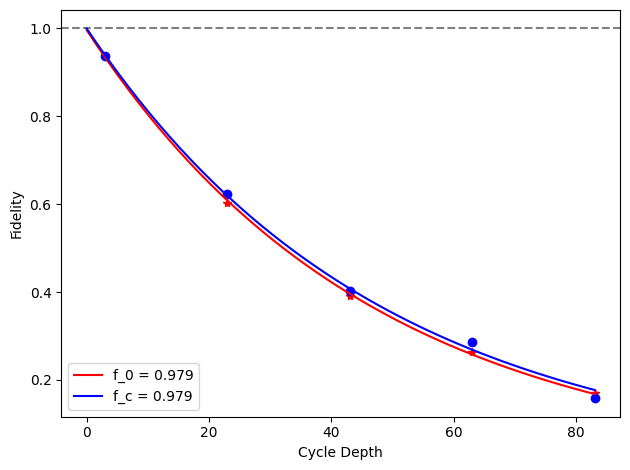

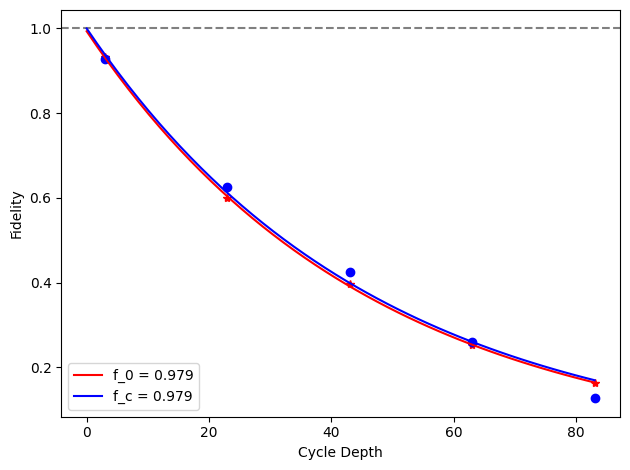

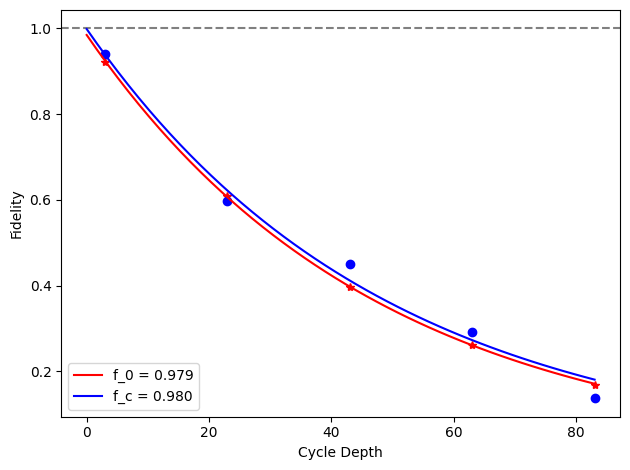

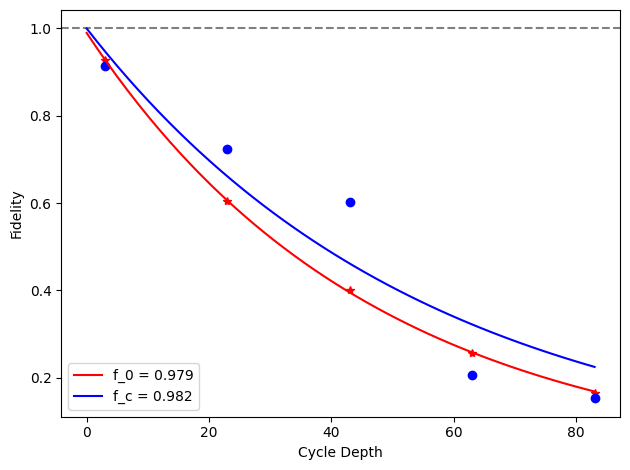

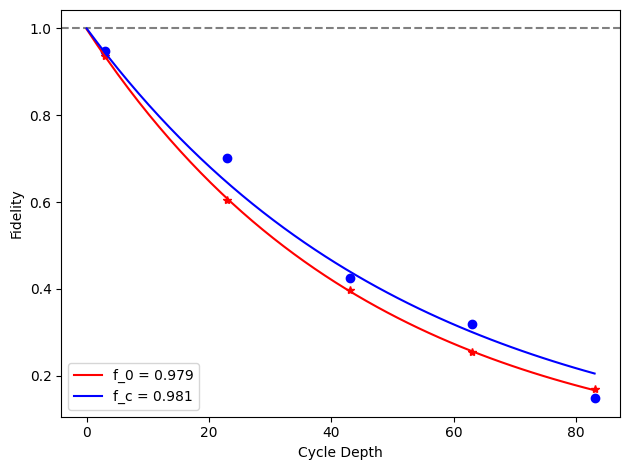

In [23]:
for i, row in before_after_df.iterrows():
    plt.axhline(1, color='grey', ls='--')
    plt.plot(row['cycle_depths_0'], row['fidelities_0'], '*', color='red')
    plt.plot(row['cycle_depths_c'], row['fidelities_c'], 'o', color='blue')

    xx = np.linspace(0, np.max(row['cycle_depths_0']))
    plt.plot(
        xx,
        exponential_decay(xx, a=row['a_0'], layer_fid=row['layer_fid_0']),
        color='red',
        label=f'f_0 = {row["layer_fid_0"]:.3f}',
    )
    plt.plot(
        xx,
        exponential_decay(xx, a=row['a_c'], layer_fid=row['layer_fid_c']),
        color='blue',
        label=f'f_c = {row["layer_fid_c"]:.3f}',
    )

    plt.xlabel('Cycle Depth')
    plt.ylabel('Fidelity')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()